In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pydicom as dicom
import PIL # optional
import csv
import ast 

In [24]:
filename = '/scratch/ebc308/tcia/data/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/000030.dcm'
dataset = dicom.dcmread(filename)

# filename = '/scratch/ebc308/tcia/data_png/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/000030.png'

In [25]:
#read dicom image
if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)


Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.703125, 0.703125]


In [26]:
# file = '000030.dcm'
file = '000038.dcm'
df = pd.read_csv("./old_scripts/total.csv")
thisImage = df.loc[df['imageName'] == file]
tempBox=[]
for index, row in thisImage.iterrows():
    tempBox.append([row[3], row[4], row[5],row[6]])
tempBox
# tempBox

[[403.0, 403.0, 272.0, 272.0], [392.0, 392.0, 317.0, 317.0]]

In [27]:
# testing = pd.read_csv("/scratch/ebc308/tcia/data/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/LIDC-IDRI-0001.csv")

# testing

In [29]:
# boxes = [[299.0,337.0,346.0,389.0]] # 512,512] # must be ints!!!
# boxes =[[300.0,335.0,349.0,385.0]]
# x min xmax ymin ymax
# 302.0,329.0,351.0,384.0

boxes = [[302.0,351.0,329.0,384.0]]
# xmin ymin xmax ymax
def load_mask(image_id, boxes):
    masks = np.zeros([512, 512, len(boxes)], dtype='uint8')
    # create masks
#     print(masks)
    class_ids = list()
    print("boxes: " ,boxes)
    for i in boxes:
#         box = boxes[i]
#         print("box: ", i[0])
        row_s = i[1] #ymin
        row_e = i[3] #ymax
        col_s, col_e = (i[0]), (i[2]) #xmin #xmax
        
        # old version x1 x2 y1 y2
#         row_s = i[2] #ymin
#         row_e = i[3] #ymax
#         col_s, col_e = (i[0]), (i[1]) #xmin #xmax
        print(col_s, col_e)
#         print(int(row_s))
#         row_s = int(row_s)
#         row_e = int(row_e)
#         col_s = int(col_s)
#         col_e = int(col_e)
#         int(row_s, row_e, col_s, col_e)
        masks[int(row_s):int(row_e), int(col_s):int(col_e)] = 1
#         class_ids.append(self.class_names.index('kangaroo'))
    return masks #, asarray(class_ids, dtype='int32')

# mask= load_mask('000014.dcm',boxes)
mask= load_mask('000030.dcm',boxes)
# print (mask.shape)

boxes:  [[302.0, 351.0, 329.0, 384.0]]
302.0 329.0


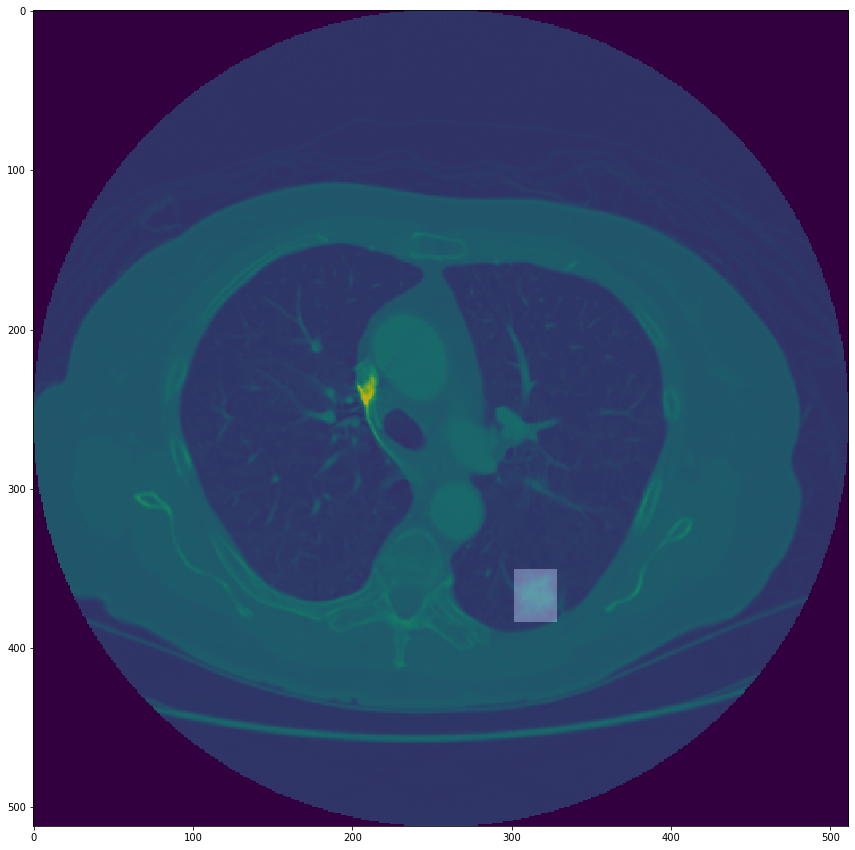

In [30]:
# plot the image using matplotlib
plt.figure(figsize=(15,15))
plt.imshow(dataset.pixel_array) #, cmap=plt.cm.bone)
plt.imshow(mask[:, :, 0], cmap='gray', alpha=0.25)
plt.show()

In [43]:
# df = pd.read_csv('temp.csv')
df = pd.read_csv('large_nodules_png_bounding_box.csv')
# df = df.iloc[:3,:]
bigger_area =  df['areas'] > 1000.0
df = df[bigger_area]
# df =  df.iloc[:3,:]
df.to_csv("area_larger_than_1000.csv", index=False)

/scratch/ebc308/tcia/data/LIDC-IDRI/LIDC-IDRI-0796/01-01-2000-CT GUIDED LUNG B-69712/2-17499//000172.dcm
boxes:  [[337.0, 189.0, 376.0, 224.0]]
337.0 376.0
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.703125, 0.703125]


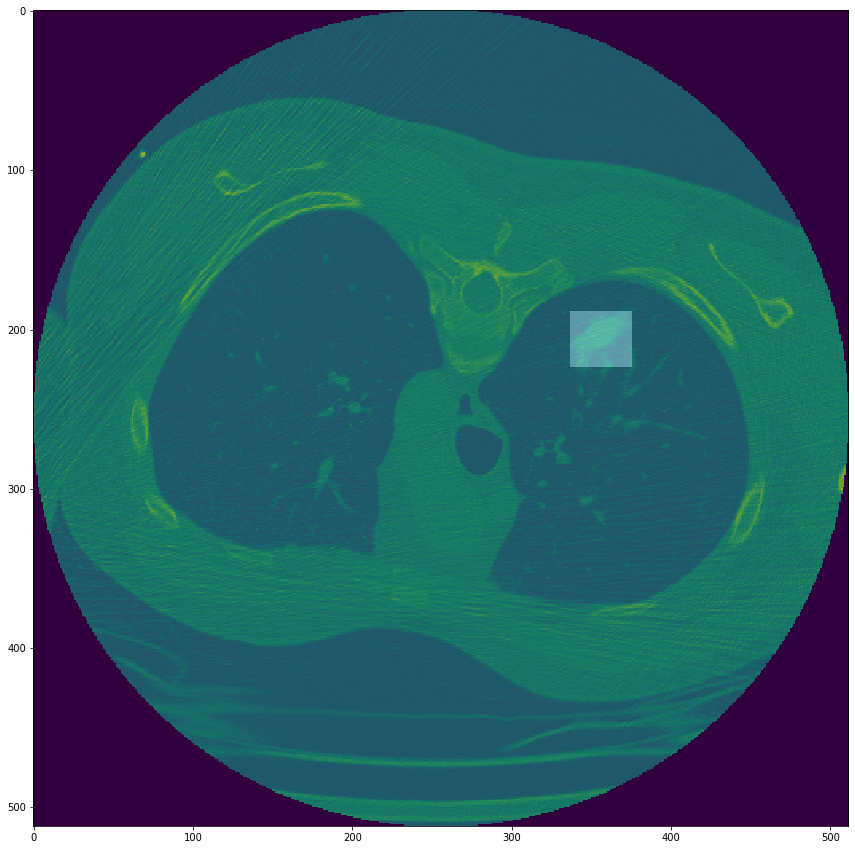

/scratch/ebc308/tcia/data/LIDC-IDRI/LIDC-IDRI-0796/01-01-2000-CT GUIDED LUNG B-69712/2-17499//000174.dcm
boxes:  [[335.0, 186.0, 375.0, 225.0]]
335.0 375.0
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.703125, 0.703125]


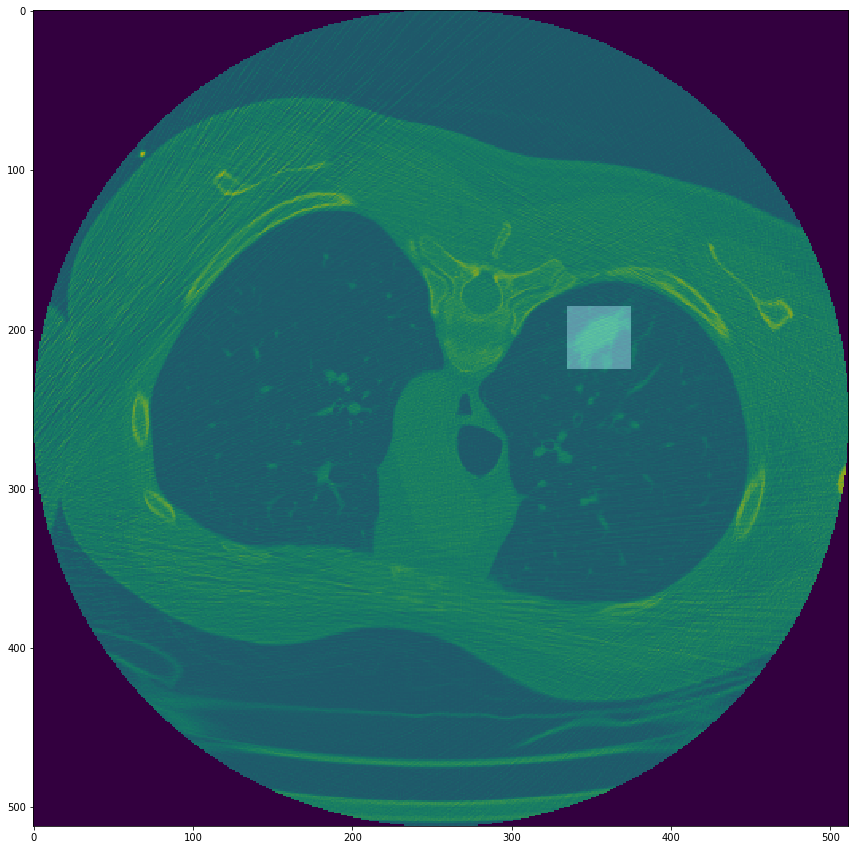

/scratch/ebc308/tcia/data/LIDC-IDRI/LIDC-IDRI-0796/01-01-2000-CT GUIDED LUNG B-69712/2-17499//000019.dcm
boxes:  [[333.0, 189.0, 369.0, 219.0]]
333.0 369.0
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.703125, 0.703125]


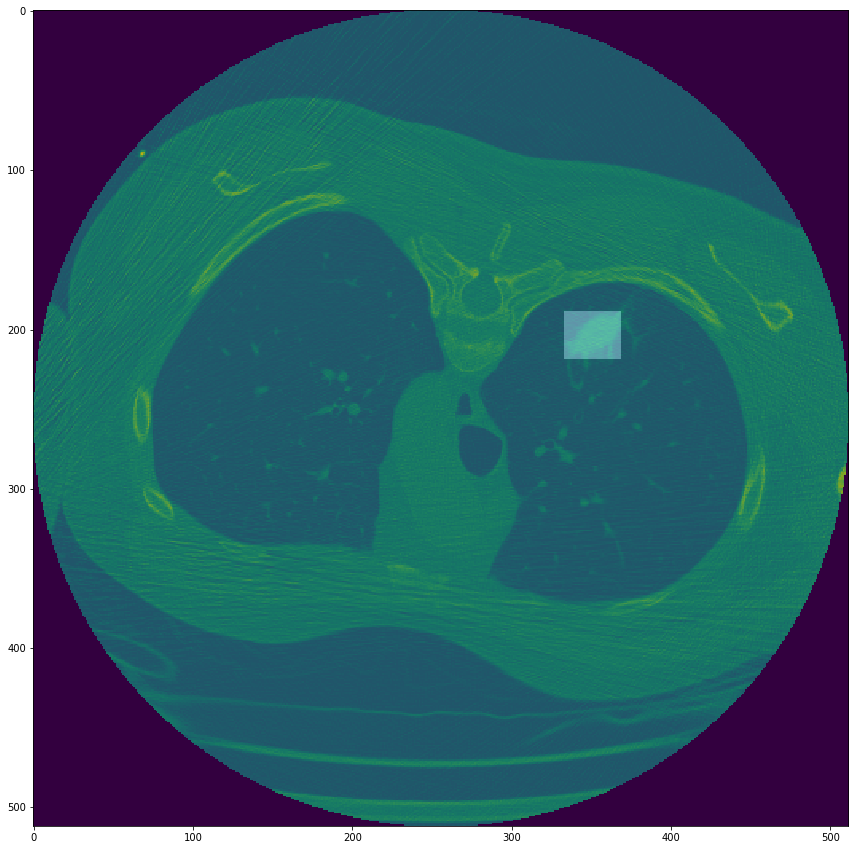

In [40]:
for index, row in df.iterrows():
    boxes = ast.literal_eval(row.boxes)
    
    path = (row.path.replace("data_png", "data"))
    path = path.replace(row.imageName, "/"+row.imageName)
    path = path.replace("png", "dcm")
    
    print(path)
    
    mask= load_mask(path, boxes)
    # plot the image using matplotlib
    plt.figure(figsize=(15,15))
    dataset = dicom.dcmread(path)
    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print("Pixel spacing....:", dataset.PixelSpacing)
        
    plt.imshow(dataset.pixel_array) #, cmap=plt.cm.bone)
    plt.imshow(mask[:, :, 0], cmap='gray', alpha=0.25)
    plt.show()
    
# boxes:  [[337.0, 189.0, 376.0, 224.0]] xmin ymin xmax ymax

# 337.0,376.0,189.0,224.0 xmin xmax ymin ymax
